In [86]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import shutil
import cv2
import matplotlib.image as mpimg
from PIL import Image
import pandas as pd
from scipy import integrate

pi = np.pi
sin = np.sin
cos = np.cos
exp = np.exp

point = 4

# x_range = x_point // 2
# y_range = y_point // 2
x_range = 50*10**(-3) #m
y_range = 50*10**(-3) #m

x = np.linspace(-x_range, x_range, point)
y = np.linspace(-y_range, y_range, point)

# それぞれ左手系での行列なことに注意
X, Y = np.meshgrid(x, y)
# XはそのままでいいがYは上下反転させる
Y = np.flipud(Y)

r = np.linspace(-x_range, x_range, point)
R = np.sqrt(X**2+Y**2)

phi = np.linspace(0, 2*pi, point)
Phi = np.zeros((point, point))
for i in range(point):
  for j in range(point):
    x = X[i, j]
    y = Y[i, j]
    deg = math.atan2(abs(y), abs(x))
    if x >= 0 and y >= 0:
      Phi[i, j] = deg
    elif x <= 0 and y >= 0:
      Phi[i,j] = pi - deg
    elif x <= 0 and y <= 0:
      Phi[i,j] = pi + deg
    elif x >= 0 and y <= 0:
      Phi[i,j] = 2*pi - deg

# plt.imshow(R)
# plt.colorbar()
# plt.show()

In [88]:
u = np.zeros((point, point))
k = 2*pi / (405*10**(-9))
z = 10**(-2)
for i in range(point):
  for j in range(point):
    f = lambda theta, r: exp(1j*k*r**2/(2*z))*exp(-1j*k*1*(X[i][j]*cos(theta)+Y[i][j]*sin(theta)))
    u[i][j] = integrate.dblquad(f, 0, 2*pi, 0, 10**(-3))[0]

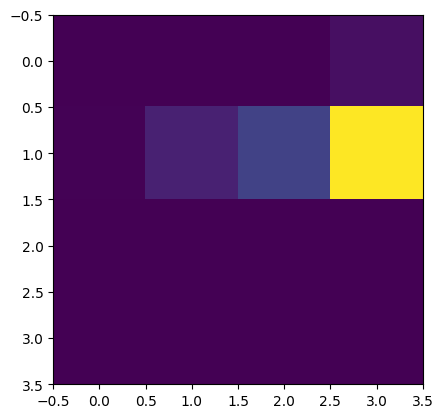

In [89]:
plt.imshow(abs(u)**2)
plt.show()

---

In [78]:
integrate.dblquad(f, 0, 2*pi, 0, 10**(-3))

(5594371243991075.0, 3285.5130853652954)

In [17]:
import numpy as np

# x, y の範囲を指定してグリッドを作成
x_vals = np.linspace(0, 1, 100)
y_vals = np.linspace(0, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# 積分したい関数 f(x, y) = x^2 + y^2
Z = f(X, Y, R, Phi)

# 数値積分を行う
# まず x に対して積分（y は固定）
integral_x = np.trapz(Z, r, axis=1)

# 次に y に対して積分
integral_y = np.trapz(integral_x, phi)

print(f"Result of the double integral: {integral_y}")


TypeError: unsupported operand type(s) for ** or pow(): 'numpy.ufunc' and 'complex'

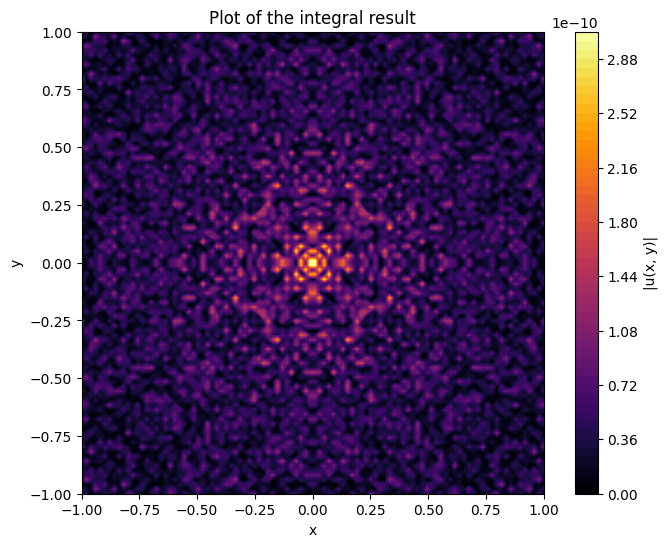

In [26]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.special import j0  # ベッセル関数 J_0

# 定数を定義
k = 2 * np.pi / (405*10**(-9))  # 波数（例として波長0.5）
z = 10*10**(-3)  # 観測面までの距離
a = 1*10**(-3)  # 積分範囲の上限

# 被積分関数を定義
def integrand(r, x, y, z, k):
    return r * np.exp(1j * k * r**2 / (2 * z)) * j0(k * r * np.sqrt(x**2 + y**2) / z)

# 積分の結果を格納する関数
def compute_integral(x, y):
    result, _ = quad(integrand, 0, a, args=(x, y, z, k))
    return np.abs(result)  # 結果の絶対値を取る

# 観測範囲を定義
x_vals = np.linspace(-1, 1, 100)  # x座標
y_vals = np.linspace(-1, 1, 100)  # y座標
X, Y = np.meshgrid(x_vals, y_vals)    # グリッドを作成

# 各点に対して積分結果を計算
Z = np.zeros_like(X)
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        Z[i, j] = compute_integral(x_vals[i], y_vals[j])

# プロット
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='inferno')  # カラーマップを使用した等高線プロット
plt.colorbar(label='|u(x, y)|')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the integral result')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


c:\Users\koike\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\integrate\_quadpack_py.py:611: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
C:\Users\koike\AppData\Local\Temp\ipykernel_21220\170730305.py:18: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(integrand, 0, a, args=(x, y, z, k))
C:\Users\koike\AppData\Local\Temp\ipykernel_21220\170730305.py:18: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad

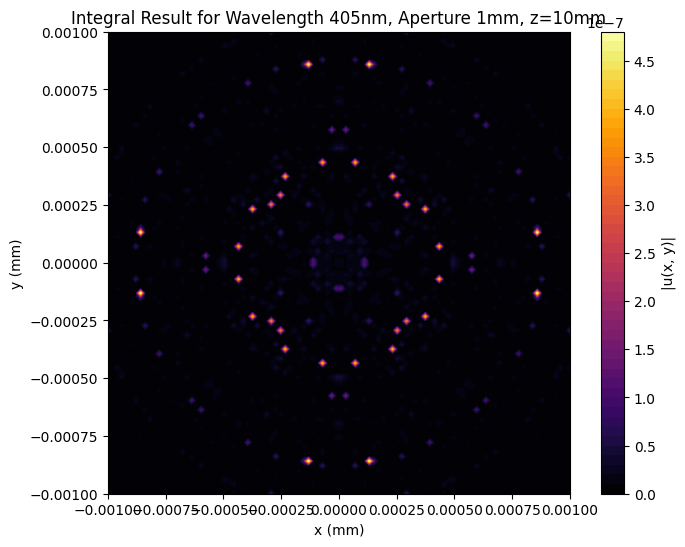

In [32]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.special import j0  # ベッセル関数 J_0

# パラメータ設定
wavelength = 405e-9  # 波長 405 nm = 405e-9 m
k = 2 * np.pi / wavelength  # 波数
z = 1e-3  # 観測面までの距離 10 mm
a = 10e-3  # 開口の半径 0.5 mm

# 被積分関数を定義
def integrand(r, x, y, z, k):
    return r * np.exp(1j * k * r**2 / (2 * z)) * j0(k * r * np.sqrt(x**2 + y**2) / z)

# 積分の結果を格納する関数
def compute_integral(x, y):
    result, _ = quad(integrand, 0, a, args=(x, y, z, k))
    return np.abs(result)  # 結果の絶対値を取る

# 観測範囲を定義
x_vals = np.linspace(-1.0e-3, 1.0e-3, 100)  # x座標 (±1 mm)
y_vals = np.linspace(-1.0e-3, 1.0e-3, 100)  # y座標 (±1 mm)
X, Y = np.meshgrid(x_vals, y_vals)    # グリッドを作成

# 各点に対して積分結果を計算
Z = np.zeros_like(X)
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        Z[i, j] = compute_integral(x_vals[i], y_vals[j])

# プロット
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='inferno')  # カラーマップを使用した等高線プロット
plt.colorbar(label='|u(x, y)|')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Integral Result for Wavelength 405nm, Aperture 1mm, z=10mm')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


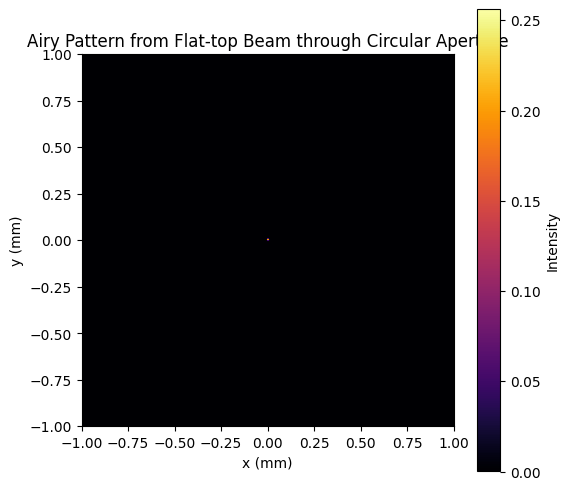

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1  # ベッセル関数 J1

# パラメータ
wavelength = 405e-9  # 波長 405 nm
k = 2 * np.pi / wavelength  # 波数
a = 0.5e-3  # 円形開口の半径 0.5 mm
z = 10e-3  # 観測面までの距離 10 mm

# フラットトップビームを円形開口に通した場合の回折パターン
def airy_pattern(r, a, wavelength, z):
    # ベッセル関数を使った回折パターンの計算
    kr = k * r * a / z
    # 中心部で特別処理 (J1(0)/0 の極限は1)
    intensity = (2 * j1(kr) / kr)**2
    intensity[kr == 0] = 1.0  # 中心部はベッセル関数の極限で1
    return intensity

# 観測面の座標系を定義
x_vals = np.linspace(-1e-3, 1e-3, 500)  # x座標 (±1 mm)
y_vals = np.linspace(-1e-3, 1e-3, 500)  # y座標 (±1 mm)
X, Y = np.meshgrid(x_vals, y_vals)
R = np.sqrt(X**2 + Y**2)  # 極座標のr

# 回折パターンの計算
Z = airy_pattern(R, a, wavelength, z)

# プロット
plt.figure(figsize=(6, 6))
plt.imshow(Z, extent=(-1, 1, -1, 1), cmap='inferno')
plt.colorbar(label='Intensity')
plt.title('Airy Pattern from Flat-top Beam through Circular Aperture')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.show()


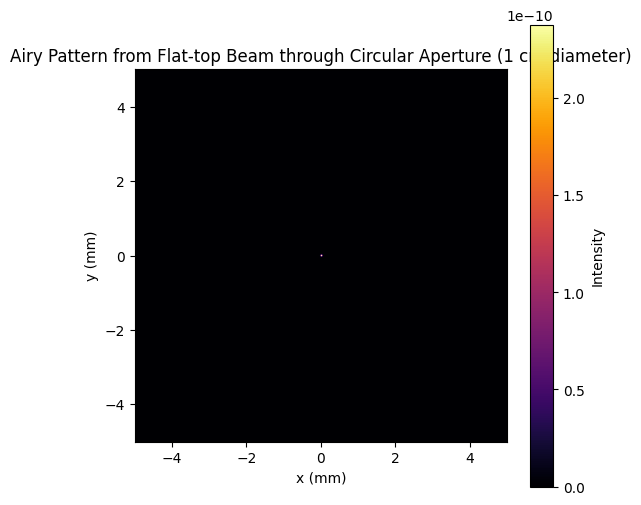

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1  # ベッセル関数 J1

# パラメータ
wavelength = 405e-9  # 波長 405 nm
k = 2 * np.pi / wavelength  # 波数
a = 100e-3  # 入射ビームの半径 5 mm (1 cmの直径)
z = 10e-3  # 観測面までの距離 10 mm

# フラットトップビームを円形開口に通した場合の回折パターン
def airy_pattern(r, a, wavelength, z):
    kr = k * r * a / z
    intensity = (2 * j1(kr) / kr)**2
    intensity[kr == 0] = 1.0  # 中心部はベッセル関数の極限で1
    return intensity

# 観測面の座標系を定義
x_vals = np.linspace(-5e-3, 5e-3, 500)  # x座標 (±5 mm)
y_vals = np.linspace(-5e-3, 5e-3, 500)  # y座標 (±5 mm)
X, Y = np.meshgrid(x_vals, y_vals)
R = np.sqrt(X**2 + Y**2)  # 極座標のr

# 回折パターンの計算
Z = airy_pattern(R, a, wavelength, z)

# プロット
plt.figure(figsize=(6, 6))
plt.imshow(Z, extent=(-5, 5, -5, 5), cmap='inferno')
plt.colorbar(label='Intensity')
plt.title('Airy Pattern from Flat-top Beam through Circular Aperture (1 cm diameter)')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.show()


C:\Users\koike\AppData\Local\Temp\ipykernel_21220\2635110034.py:34: RuntimeWarning: invalid value encountered in sqrt
  R = np.sqrt(np.meshgrid(r))


TypeError: 'norm' must be an instance of matplotlib.colors.Normalize, str or None, not a numpy.ndarray

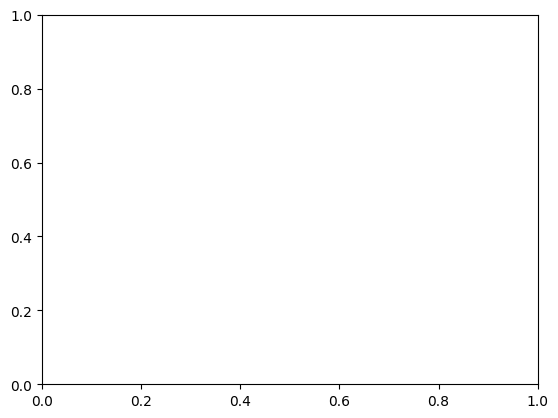

In [67]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import shutil
import cv2
import matplotlib.image as mpimg
from PIL import Image
import pandas as pd
from scipy import integrate

pi = np.pi
sin = np.sin
cos = np.cos
exp = np.exp

x_point = 256
y_point = 256

# x_range = x_point // 2
# y_range = y_point // 2
x_range = 1
y_range = 1

x = np.linspace(-x_range, x_range, x_point)
y = np.linspace(-y_range, y_range, y_point)

# それぞれ左手系での行列なことに注意
X, Y = np.meshgrid(x, y)
# XはそのままでいいがYは上下反転させる
Y = np.flipud(Y)

r = np.linspace(-1, 1, 256)
R = np.sqrt(np.meshgrid(r))

phi = np.linspace(0, 2*pi, 256)
Phi = np.zeros((y_point, x_point))
for i in range(y_point):
  for j in range(x_point):
    x = X[i, j]
    y = Y[i, j]
    deg = math.atan2(abs(y), abs(x))
    if x >= 0 and y >= 0:
      Phi[i, j] = deg
    elif x <= 0 and y >= 0:
      Phi[i,j] = pi - deg
    elif x <= 0 and y <= 0:
      Phi[i,j] = pi + deg
    elif x >= 0 and y <= 0:
      Phi[i,j] = 2*pi - deg

k = 2*pi/(405*10**(-9))
z = 10*10**(-3)
theta = np.linspace(0, 2*pi, 256)

Z = exp(1j*k*r**2/(2*z))*exp(1j*k*(r*(X*cos(theta)+Y*sin(theta)))/z)
plt.imshow(r, theta, Z)

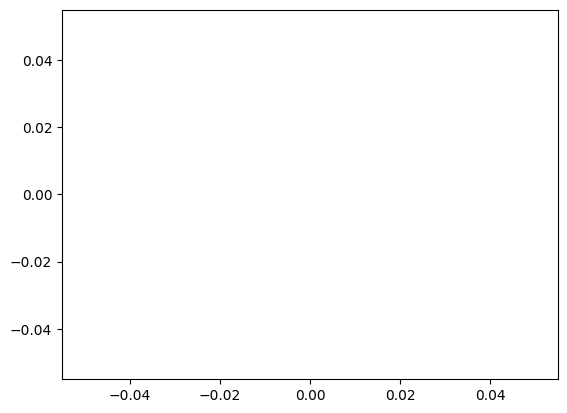

In [60]:
I = abs(u)**2
plt.imshow(I)
plt.show()